Horsetail matching is a method for optimizing under uncertainty. Whilst it was intended for use in engineering design, it is a general method and so can be used in any application of optimization under uncertainty if desired.

When using optimization for engineering design, we are interested in the behavior of a quantity of interest, q, as a function of controllable design variables, x, and uncontrollable uncertainties, u. As an example, consider designing an airplane wing in order to minimize drag. We can control the shape of the wing through a parameterization scheme, giving the design variables x. However there are also a number of parameters we cannot control, giving u, for example the exact operating conditions may vary, our computational model may not fully capture the true physical behavior (e.g. turbulence modelling), and our manufacturing process may not produce exactly the shape we designed. In order to design the wing using optimization under uncertainty we must describe these uncertainties mathematically, and then optimize some measure of how the drag behaves as a function of these uncertainties. 

In horsetail matching, this measure is the difference between the horsetail plot for a current design and a target. 
A horsetail plot consists of the upper and lower bounds on the cumulative distribution function (CDF), and so a horsetail plot quantitavely describes the behavior of the quantity of interest under uncertainty. Therefore the goal is to find a design, given by x, that optimizes this behavior under uncertainty: in the sense that the horsetail plot is as close as possible to the target. For more information on horsetail matching, please see: http://www.tandfonline.com/doi/full/10.1080/0305215X.2017.1327581 and https://arc.aiaa.org/doi/10.2514/6.2017-0590. 


**This tutorial illustrates how to setup and run a simple horsetail matching optimization.** 
Note that for clarification on how any of the module works, see the documentation available at: http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/documentation/

To begin with, we will only consider probabilistic uncertainties. This requires a probability distribution to be assigned to all of our uncertain parameters, and this is propagated to give a probability distribution of our quantity of interest for a given design x. Therefore the horsetail plot is the CDF itself and we are essentially doing CDF matching.

Firstly we need to import the functions and classes we will use from the horsetail matching module...

In [1]:
from horsetailmatching import UncertainParameter, UniformParameter, GaussianParameter, HorsetailMatching
from horsetailmatching.demoproblems import TP1

The first thing required for an optimization under uncertainty is a function to optimize. The horsetail matching python module comes with several test problems, which we will use here. 

The horsetail matching object requires a function that takes two arguments: the value of the design variables, and the value of the uncertainties; it should return the value quantity of interest.  

In reality, this function is likely to be a computationally expensive simulation, for example in our wing design example this will be a 3D computational fluid dynamics simulation of the wing geometry given by x and the value of the uncertain parameters given by u. 

In [2]:
my_func = TP1
print TP1(x=[0, 1], u=[1, 0])

0.1


Next we must define the input uncertainties to the problem, by creating horsetail matching parameters. We can assign the parameters a distribution by using the base UncertainParameter class and defining a pdf function, or we can use the specific distribution subclasses such as UniformParameter and GaussianParameter. 

Here we create a uniformly distributed uncertainty and a gaussian uncertainty.

Then we create the HorsetailMatching object which will do the evalation of the horsetail matching metric. We can specify the target inverse CDF using the ftarget argument (by default a standard target of t(h) = 0 is used). 

In [3]:
def myPDF(u):
    if u > 1 or u < -1:
        return 0
    else:
        return 0.5

u_uniform = UncertainParameter(myPDF, lower_bound=-1, upper_bound=1)
u_gaussian = GaussianParameter(mean=0, standard_deviation=1)

def my_target(h): 
    return 0

theHM = HorsetailMatching(my_func, [u_uniform, u_gaussian], ftarget=my_target)

Now we use the evalMetric method to evaluate the horsetail matching metric at a design point:

In [4]:
print(theHM.evalMetric(x=[1,1]))

1.23154901878


We can use the getHorsetail() method to visualize the behaviour under uncertainty. It returns plottable lists of values for the two horsetail curves (the upper and lower bounds on the CDF) as the first two returned tuples. In this case the two bounds are coincidental and the horsetail plot is the CDF. 

We can then plot this using the matplotlib module for plotting in python. 

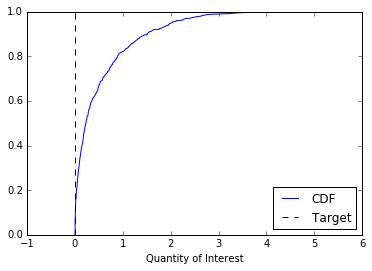

In [5]:
import matplotlib.pyplot as plt
(x1, y1), (x2, y2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot([theHM.ftarget(y) for y in y1], y1, 'k--', label='Target')
plt.xlim([-1, 6])
plt.xlabel('Quantity of Interest')
plt.legend(loc='lower right')
plt.show()

Now if we want to use this within an optimization, its a simple as passing theHM.evalMetric to whichever optimizer we like. For example, using the scipy optimize module's minimize function:

In [6]:
from scipy.optimize import minimize

solution = minimize(theHM.evalMetric, x0=[3,2], method='Nelder-Mead')
print(solution)

  status: 0
    nfev: 107
 success: True
     fun: 0.0
       x: array([-2.46257592,  2.46257594])
 message: 'Optimization terminated successfully.'
     nit: 54


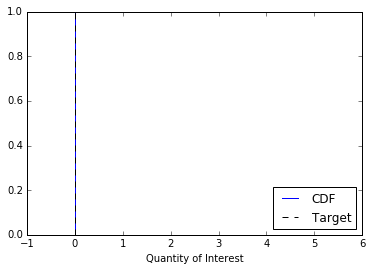

In [7]:
(x1, y1), (x2, y2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot([theHM.ftarget(y) for y in y1], y1, 'k--', label='Target')
plt.xlim([-1, 6])
plt.xlabel('Quantity of Interest')
plt.legend(loc='lower right')
plt.show()

For this simple test problem the minimum is at x=[0, 0] where the CDF is a step function at 0, and so the horsetail matching metric is also 0. 

This concludes our introduction to horsetail matching. 

In the next tutorial, we do horsetail matching when not all of our uncertainties can be represented probabilistically: http://nbviewer.jupyter.org/github/lwcook/horsetail-matching/blob/master/notebooks/MixedUncertainties.ipynb

For other tutorials, please visit http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/